# Haberman Cancer Survival Data Set Exploratory Data Analysis
The Haberman’s survival data set contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:

Age of patient at time of operation (numerical) 
Patient’s year of operation (year — 1900, numerical) 
Number of positive auxillary nodes detected (numerical) 
Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years 
Setting the objective is the key in EDA which will structure your thoughts in the entire analysis. Here the objective is to predict whether the patient will survive after 5 years or not based upon the patient’s age, 
year of treatment and the number of positive lymph nodes.


In [1]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#load the haberman dataset by csv format

habersman=pd.read_csv("C:/Users/Excel/Desktop/CSV Files/haberman.csv")
habersman

,age,op year,auxillary node,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [2]:
print(habersman.shape)
print(habersman.columns)

(306, 4)
Index(['age', 'op year', 'auxillary node', 'survival'], dtype='object')


habersman dataset has 306 datapoints
and 4 class variables

In [3]:
habersman['survival'].value_counts()           #imbalanced  dataset 


1    225
2     81
Name: survival, dtype: int64

Habersman dataset is imbalanced dataset 

In [4]:
# convert classlabel numerical to categorical for better understanding .
habersman['survival']=habersman['survival'].map({1:'yes',2:'no'})
habersman['survival']=habersman['survival'].astype("category")
print(habersman.head())

   age  op year  auxillary node survival
0   30       64               1      yes
1   30       62               3      yes
2   30       65               0      yes
3   31       59               2      yes
4   31       65               4      yes


In [5]:
#descriptive statistics
habersman.describe()

,age,op year,auxillary node
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


CONVERT NUMERICAL VALUE TO CATEGORICAL VALUE

# BIVARIATE ANALYSIS

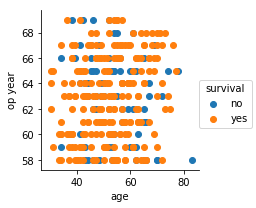

In [6]:
# Bivariate doesnot make any sense without color class label .we will do the simple hack with seaborn
sns.FacetGrid(habersman,hue="survival",size=3)\
   .map(plt.scatter,'age','op year')\
   .add_legend();
plt.show();


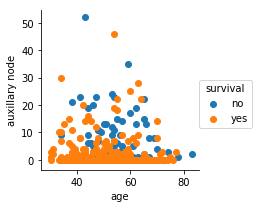

In [7]:
sns.FacetGrid(habersman,hue="survival",size=3)\
   .map(plt.scatter,'age','auxillary node')\
   .add_legend();
plt.show();

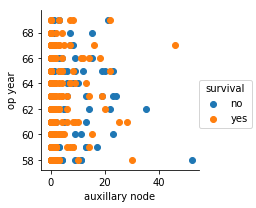

In [8]:
sns.FacetGrid(habersman,hue="survival",size=3)\
   .map(plt.scatter,'auxillary node','op year')\
   .add_legend();
plt.show();

OBSERVATION:
           Its to difficult to classify the variables due to overlapping .but we can say most of the patient are survived at auxillary node zero.

<function matplotlib.pyplot.show(*args, **kw)>

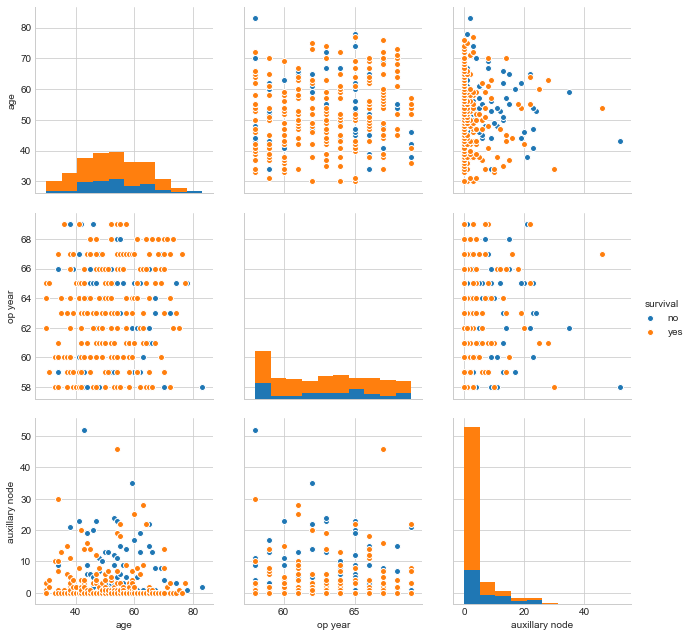

In [9]:
# pairwise plot is used .when the numbers of features are in high dimensional.
# only we can visualize in 2d ,3d. but not in 4d .simple hack is used for 4d  like using pairplot

plt.close()
sns.set_style("whitegrid")
sns.pairplot(habersman, hue="survival", size=3)
plt.show

Observation: 
unable to classify due to overlapping

# histogram and probability density function(pdf)

C:\Users\Excel\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Excel\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


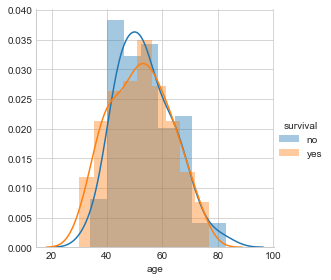

In [10]:
# histogram

sns.FacetGrid(habersman,hue='survival',size=4)\
   .map(sns.distplot, 'age')\
   .add_legend();
plt.show();

C:\Users\Excel\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Excel\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


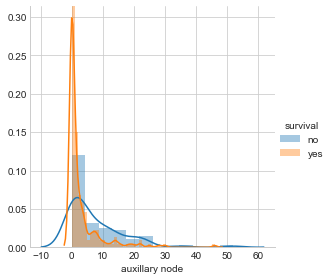

In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.FacetGrid(habersman,hue='survival',size=4)\
   .map(sns.distplot, 'auxillary node')\
   .add_legend();
plt.show();

C:\Users\Excel\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Excel\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


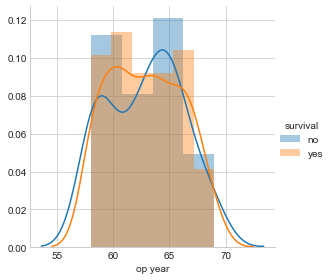

In [12]:
sns.FacetGrid(habersman,hue='survival',size=4)\
   .map(sns.distplot, 'op year')\
   .add_legend();
plt.show();

Observation:
1. 30 to 35 percent  patients are survived whose auxillary nodes between 0 to 5.
2. Most of the  unsucessful operation are between op_year between 64 to 67.

# cummulative density function (cdf)

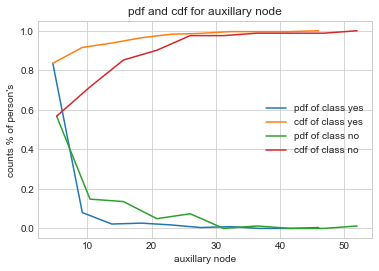

In [13]:
#https://www.kaggle.com/premvardhan/exploratory-data-analysis-haberman-s-survival
yes = habersman.loc[habersman["survival"] == "yes"]
no = habersman.loc[habersman["survival"] =="no"]
label=[ "pdf of class yes","cdf of class yes","pdf of class no", "cdf of class no" ]

counts,bin_edges=np.histogram(yes['auxillary node'],bins=10,density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for auxillary node")
plt.xlabel("auxillary node")
plt.ylabel("counts % of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(no["auxillary node"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()



observation : patient have more than  46 auxillary node will not survive

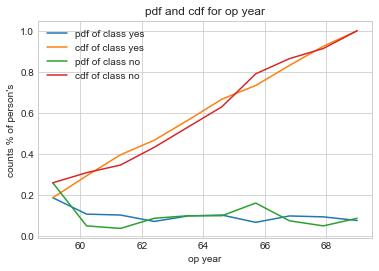

In [14]:

counts,bin_edges=np.histogram(yes['op year'],bins=10,density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for op year")
plt.xlabel("op year")
plt.ylabel("counts % of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(no["op year"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()



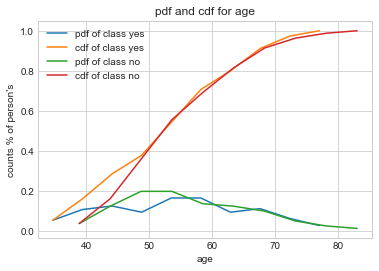

In [15]:

counts,bin_edges=np.histogram(yes['age'],bins=10,density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for age")
plt.xlabel("age")
plt.ylabel("counts % of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(no["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()



# Box plot

No handles with labels found to put in legend.


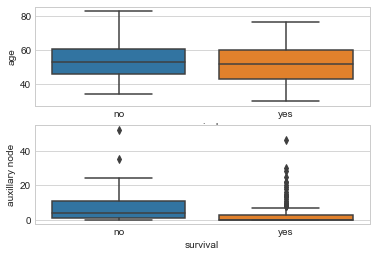

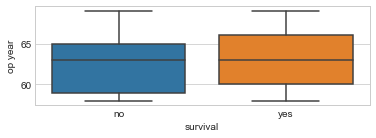

In [16]:
#extension like quantiles 
plt.close()
plt.figure(1) 
plt.subplot(211)
sns.boxplot(x = 'survival', y = 'age', data = habersman)

plt.subplot(212)
sns.boxplot(x = 'survival', y = 'auxillary node', data = habersman)

plt.figure(2)
plt.subplot(211)
sns.boxplot(x = 'survival', y = 'op year', data = habersman)
plt.legend()
plt.show()

observation : most are the patients are survived at auxillary node between "0-5"

# Violin plot

No handles with labels found to put in legend.


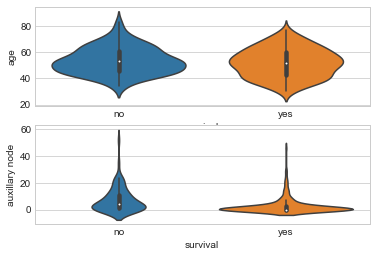

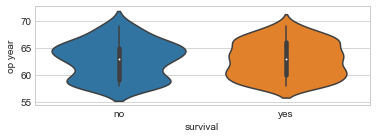

In [17]:
#its same like box plot 
plt.close()
plt.figure(1) 
plt.subplot(211)
sns.violinplot(x = 'survival', y = 'age', data = habersman)

plt.subplot(212)
sns.violinplot(x = 'survival', y = 'auxillary node', data = habersman)

plt.figure(2)
plt.subplot(211)
sns.violinplot(x = 'survival', y = 'op year', data = habersman)
plt.legend()
plt.show()


observation : most are the patients are survived at auxillary node between "0-5"

In [22]:
print("means:")
print(np.mean(yes['auxillary node']))
print(np.mean(no['auxillary node']))
# mean for op year 
print(np.mean(yes['op year']))
print(np.mean(no['op year']))
#mean for age 
print(np.mean(yes['age']))
print(np.mean(no['age']))


means:
2.7911111111111113
7.45679012345679
62.86222222222222
62.82716049382716
52.01777777777778
53.67901234567901


In [24]:
print("standard deviation:")
# std for auxillary node
print(np.std(yes['auxillary node']))
print(np.std(no['auxillary node']))
# std for op year 
print(np.std(yes['op year']))
print(np.std(no['op year']))
#std for age 
print(np.std(yes['age']))
print(np.std(no['age']))


standard deviation:
5.857258449412131
9.128776076761632
3.2157452144021956
3.3214236255207883
10.98765547510051
10.10418219303131


In [36]:
print('quantiles for auxillary node :')
print('quantile for auxillary node for sur_yes =',np.percentile(yes['auxillary node'],np.arange(0,100,25)))
print('quantile for auxillary node for sur_no =',np.percentile(no['auxillary node'],np.arange(0,100,25)))
print('90th percentiles for auxillary node :')
print('90th percentiles for auxillary node for sur_yes =',np.percentile(yes['auxillary node'],90))
print('90th percentiles for auxillary node for sur_no =',np.percentile(no['auxillary node'],90))

print('quantiles for age:')
print('quantile for age for sur_yes =',np.percentile(yes['age'],np.arange(0,100,25)))
print('quantile for age for sur_no =',np.percentile(no['age'],np.arange(0,100,25)))
print('90th percentiles for age :')
print('90th percentiles for age for sur_yes =',np.percentile(yes['age'],90))
print('90th percentiles for age for sur_no =',np.percentile(no['age'],90))



quantiles for auxillary node :
quantile for auxillary node for sur_yes = [0. 0. 0. 3.]
quantile for auxillary node for sur_no = [ 0.  1.  4. 11.]
90th percentiles for auxillary node :
90th percentiles for auxillary node for sur_yes = 8.0
90th percentiles for auxillary node for sur_no = 20.0
quantiles for age:
quantile for age for sur_yes = [30. 43. 52. 60.]
quantile for age for sur_no = [34. 46. 53. 61.]
90th percentiles for age :
90th percentiles for age for sur_yes = 67.0
90th percentiles for age for sur_no = 67.0


# observation :
     survival_yes for auxillary node :
1. 75% of the patients survived after 5 year with auxillary node at 3.
2. 90% of the patients survived after 5 years with auxillary node at 8.
    survival_no for auxillary node :
3. 75% of the patients died within 5 years with auxillary node at 11.
4. 50% of the patients died within  5 years with auxillary node at 4.
5. 90% of the patients died within  5 years with auxillary node at 20.
   survival_yes for the age:
6. 75% of the patients survied after 5 years at the age of 60.
7. 50% of the patients survied after 5 years at the age of 52.
8. 90% of the patients survived after 5 years at the age of 67.
   survival_no for age:
9. 75% of the patients survied after 5 years at the age of 61.
10. 50% of the patients survied after 5 years at the age of 53.
11. 90% of the patients survived after 5 years at the age of 67.





# conclusion 
1. The given dataset is imabalance datset.
2. Its more difficult to classify data due to overlapping. 
3. Important feature in dataset is Auxillary node .
4. most main reason of patient survival is auxillary node range between ' 0-5 '.
11. Descriptive Statistics:
5. Average age of patients is 52 with standard deviation 10.8 and range is in between 30 and 83. 
6. Average axillary nodes are 4 with standard deviation 3.2 and range is in between 0 and 52. 
7. 75% of the patients have less than 5 auxillary  nodes. 
8. 25% of the patients have auxillary  nodes.

